In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime,timedelta
import time
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

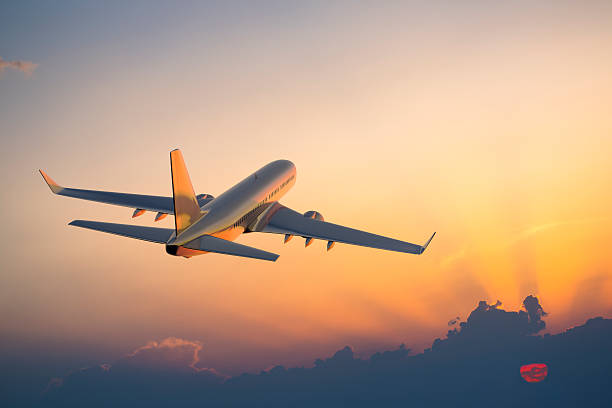

In [86]:
from IPython.display import Image
Image("flight_image.jpg")

In [87]:
flight_df=pd.read_excel("Data_Train.xlsx")#Loading the dataset

In [88]:
flight_df.head()#first 5 records

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [89]:
flight_df.tail()#Last 5 records

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [90]:
flight_df.shape#10683 Rows and 11 Columns

(10683, 11)

In [91]:
flight_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# ABOUT COLUMNS.....................
##### (1)Airline:  Name of the airline company operating the flight
##### (2)Date_of_Journey:  Date when the journey in scheduled
##### (3)Source:  The starting location or city 
##### (4)Destination: The final destination of the flight
##### (5)Route: The sequence of connecting cities or airports 
##### (6)Dep_Time: The departure time for the flight
##### (7)Arrival_Time: The expected arrival time
##### (8)Duration: The duration of flight
##### (9)Total_stops: The no. of stops or layovers during the journey
##### (10)Additional_info: Any additional info or notes about the flight
##### (11)Price: The fare or price of flight ticket

In [92]:
flight_df.dtypes # to see the data types of all col'ns

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [93]:
flight_df.describe() #description of the data

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [94]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory Data Analysis

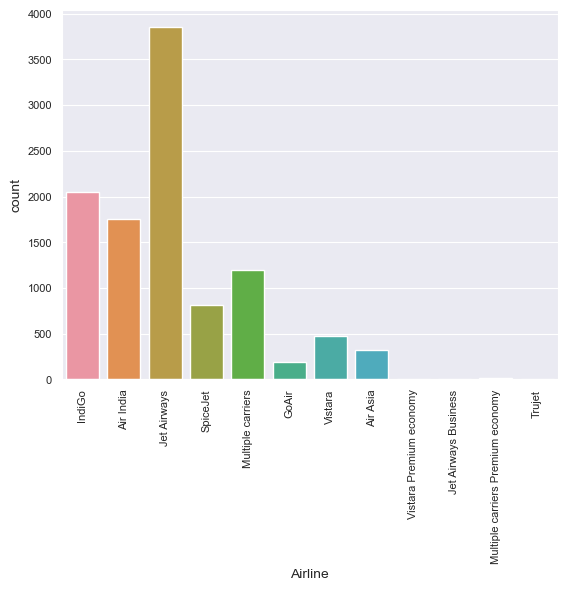

In [95]:
sns.set_style("darkgrid")
sns.countplot(x='Airline',data=flight_df)
plt.xticks(rotation=90)
plt.show()

### FEW INSIGHTS
##### >Jet Airways is the costliest among all flights
##### >Jet Airways has the highest share followed by indigo

<Axes: xlabel='Source', ylabel='count'>

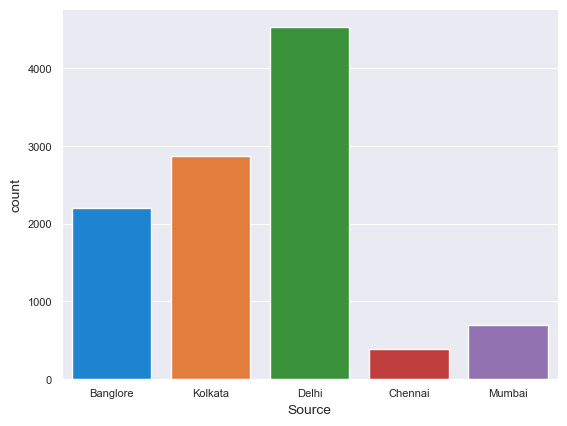

In [96]:
sns.set_style("darkgrid")
sns.countplot(x='Source',data=flight_df)

### INSIGHTS:
###### Delhi has the highest take off or originating point

<Axes: xlabel='Destination', ylabel='count'>

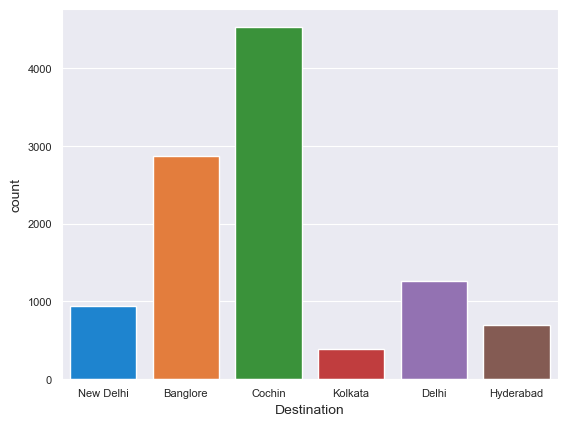

In [97]:
sns.countplot(x="Destination",data=flight_df)

#### INSIGHTS:
###### Cochin has the highest landing or arrival of flights

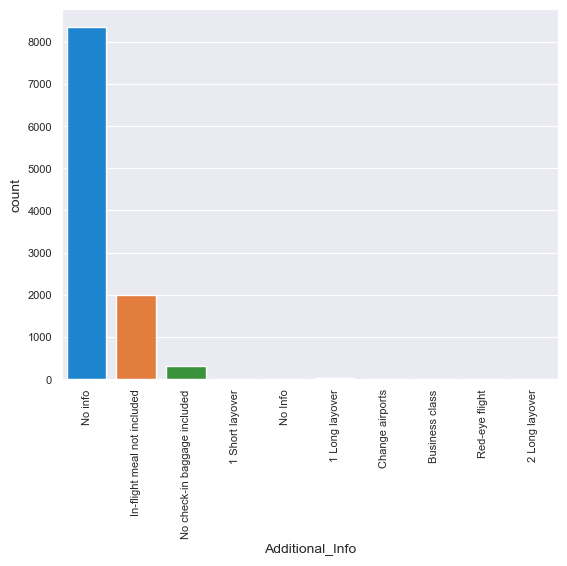

In [98]:
sns.countplot(x="Additional_Info",data=flight_df)
plt.xticks(rotation=90)
plt.show()

#### INSIGHTS:
###### Most of the flights do not have any extra info
###### There are only few flights with extra info

### What is SweetViz Library?
**SweetViz Library is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA with just two lines of code. Output is a fully self-contained HTML application. The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.**

 

In [99]:
!pip install sweetviz

In [100]:
import sweetviz as sv

In [101]:
my_report=sv.analyze(flight_df)

                                             |                                             | [  0%]   00:00 ->…

In [102]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### INSIGHTS:
**The most frequent airline is Jet Airways**

**Most flights departs from Delhi, and average price is the highest**

**Cochin is the most heavily trafficked destination**

**More than half of the flight make single stop b/w source and destination**

**The majority of the prices are within the 20,000 range,Some outliers detected**

### BIVARIATE ANALYSIS

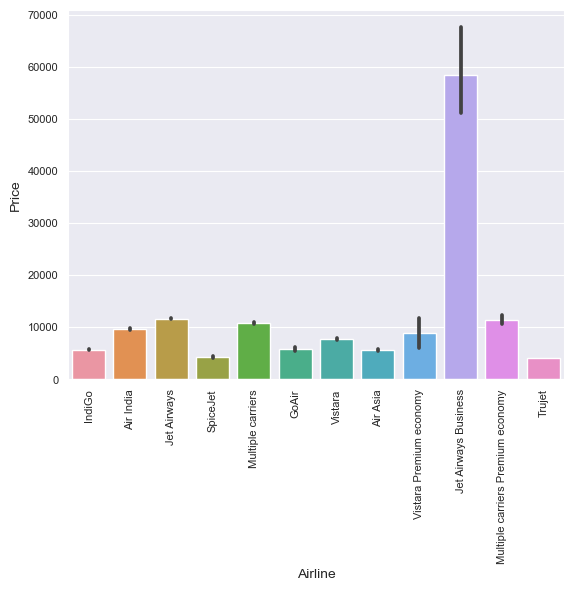

In [103]:
sns.set_style('darkgrid')
sns.barplot(x='Airline',y='Price',data=flight_df)
plt.xticks(rotation=90)
plt.show()

### INSIGHTS:
**Jet Airways Business has the highest price when compared to others.**

### DATA PREPROCESSING

In [104]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### INSIGHTS:
THERE ARE ONLY 2 NULL VALUES.

1 in Route

1 in Total_Stops

In [105]:
#Let's drop the null values
flight_df.dropna(inplace=True)

In [106]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Extracting Date and Month from Date of Journey column
#### Converting into Datetime:
*We are going to extract the date and month from the date of journey

*For this we will require pandas to_datetime functionality to convet the object datatype into DateTime data type

*dt.day the method will extract only the day from the date

*dt.month the method will extract only the month the date

In [107]:
flight_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [108]:
#DATE
flight_df["journey_Date"]=pd.to_datetime(flight_df['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [109]:
#MONTH
flight_df["journey_Month"]=pd.to_datetime(flight_df['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [110]:
flight_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


##### Since we have extracted Date Of Journey column into Date and Month.Now we can drop original Date of Journey column

In [111]:
flight_df.drop(['Date_of_Journey'],axis=1,inplace=True)

*Departure time is when the plane leaves the source

*Similar to date of journey we can extract values from departure time

*So we will be extracting hour and minutes from departure time column

In [112]:
#HOURS
flight_df['Dep_Hour']=pd.to_datetime(flight_df['Dep_Time']).dt.hour

#Minutes
flight_df['Dep_Min']=pd.to_datetime(flight_df['Dep_Time']).dt.minute

#We will drop the original dep_time as we have extracted Hour and Minutes
flight_df.drop(['Dep_Time'],axis=1,inplace=True)

In [113]:
flight_df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


*Arrival time is when a plane reaches its destination

*Similar to Date of Journey we will extract values from Arrival Time

*So we will be extracting Hour and minutes from Arrival Time Column

In [114]:
#HOURS
flight_df['Arrival_Hour']=pd.to_datetime(flight_df['Arrival_Time']).dt.hour

#Minutes
flight_df['Arrival_Min']=pd.to_datetime(flight_df['Arrival_Time']).dt.minute

#We will drop the original Arrival_Time as we have extracted Hour and Minutes
flight_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [115]:
flight_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


#### Duration Column
*Here we will try to extract Hour and Minutes from the Duration Column

In [116]:
duration=list(flight_df['Duration'])

In [117]:
#Assigning and converting duration column into list to extract hour and mins separately

duration=list(flight_df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))#extract hours
    
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))#extract mins

In [118]:
flight_df["Duration_hours"]=duration_hours
flight_df["Duration_mins"]=duration_mins

#We will drop the original Duration column
flight_df.drop(['Duration'],axis=1,inplace=True)

In [119]:
flight_df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


### Let's convert Categorical Column to Numerical Column using One Hot Encoder

In [120]:
cat_col=flight_df.select_dtypes(include=["O"])
cat_col.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


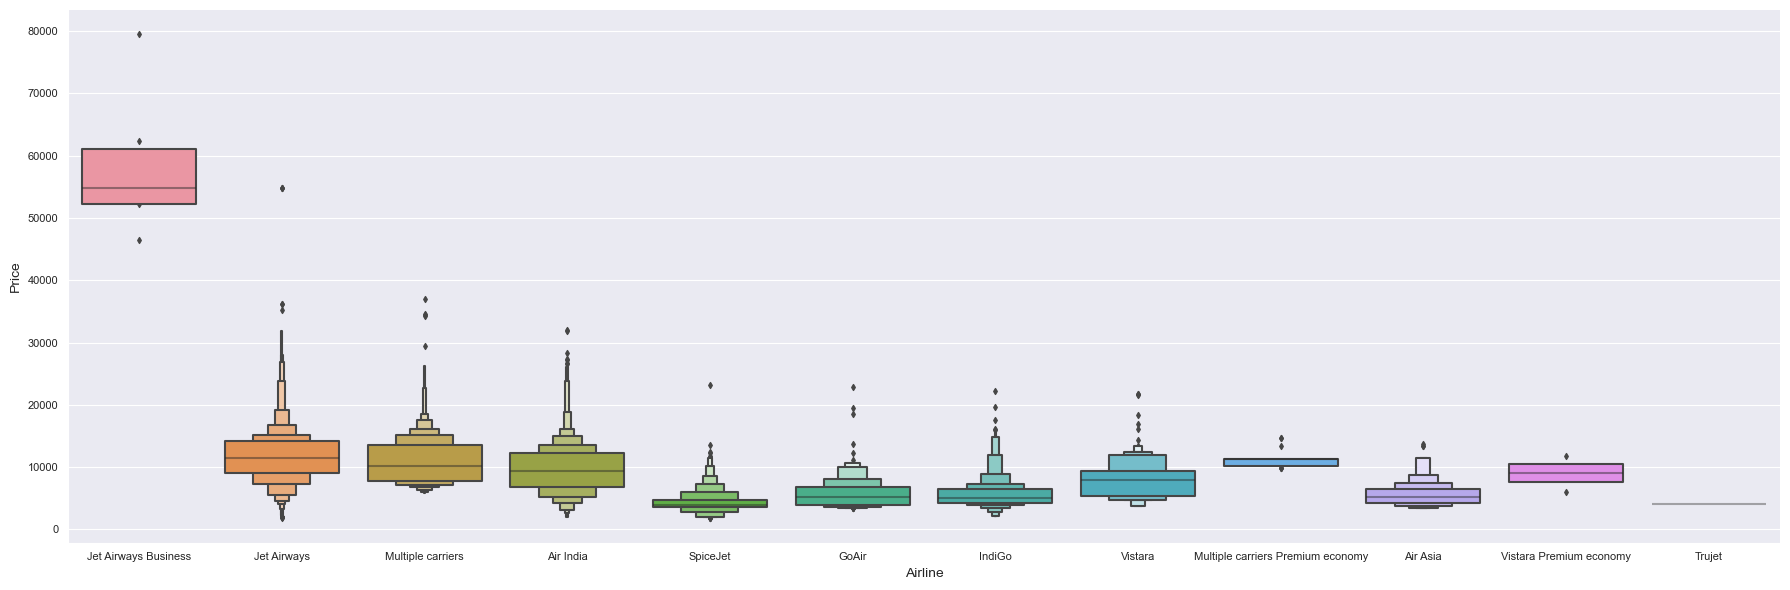

In [121]:
#Airline vs Price
sns.catplot(x='Airline',y='Price',data=flight_df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

#### Insights
*From the graph above we can understand that JetAirways has the highest price and rest are quite in same range

In [122]:
data=flight_df.copy() #Backup

In [123]:
#OneHotEncoding
df1=pd.get_dummies(data=data['Airline'],drop_first=True)
data=pd.concat([data,df1],axis=1).drop(["Airline"],axis=1)

In [124]:
data.head(3)

,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_Hour,Dep_Min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,...,0,0,1,0,0,0,0,0,0,0


In [125]:
#OneHotEncoding
df2=pd.get_dummies(data['Source'],drop_first=True)
data=pd.concat([data,df2],axis=1).drop(["Source"],axis=1)

In [126]:
data.head(3)

,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,...,0,0,0,0,0,0,0,1,0,0


In [127]:
#OneHotEncoding
df3=pd.get_dummies(data['Destination'],drop_first=True)
data=pd.concat([data,df3],axis=1).drop(["Destination"],axis=1)

In [128]:
data.head(3)

,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0


In [129]:
#dropping columns
#Additional_info-> because 80% of the data has no info
#Route-> because it is related to no. of stops
data.drop(["Route","Additional_Info"],axis=1,inplace=True)
data.head(3)

,Total_Stops,Price,journey_Date,journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


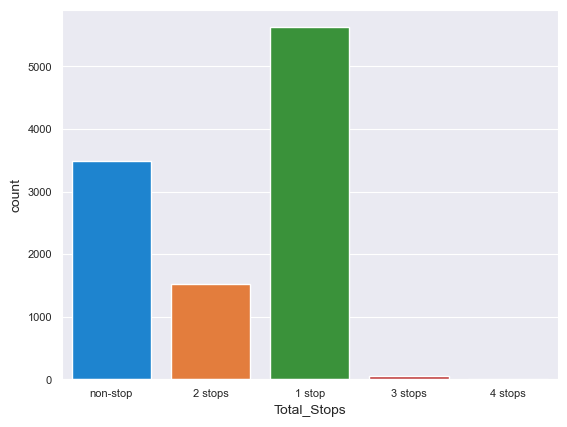

In [130]:
sns.countplot(data=flight_df,x="Total_Stops")
print(data['Total_Stops'].value_counts())

In [131]:
#Manuallly encode the total_stop column
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [132]:
df=data
df.head(3)

,Total_Stops,Price,journey_Date,journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0


In [133]:
x=df.drop("Price",axis=1)#Dropping the target variable
x.head(3)

,Total_Stops,journey_Date,journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0


### Scaling
*Will consider MinMaxScaler 

In [134]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
print(x)

[[0.         0.88461538 0.         ... 0.         0.         1.        ]
 [0.5        0.         0.66666667 ... 0.         0.         0.        ]
 [0.5        0.30769231 1.         ... 0.         0.         0.        ]
 ...
 [0.         1.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.5        0.30769231 0.66666667 ... 0.         0.         0.        ]]


### Feature Engineering

In [135]:
data=df.iloc[0:10,0:10]
data

,Total_Stops,Price,journey_Date,journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
5,0,3873,24,6,9,0,11,25,2,25
6,1,11087,12,3,18,55,10,25,15,30
7,1,22270,1,3,8,0,5,5,21,5
8,1,11087,12,3,8,55,10,25,25,30
9,1,8625,27,5,11,25,19,15,7,50


In [136]:
data.corr()

,Total_Stops,Price,journey_Date,journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
Total_Stops,1.000000,0.415321,-0.639003,0.253185,-0.502264,0.405355,0.112469,0.088946,0.430101,-0.490055
Price,0.415321,1.000000,-0.659511,-0.366571,-0.333911,0.031325,-0.193463,-0.203835,0.703591,-0.542767
journey_Date,-0.639003,-0.659511,1.000000,0.267372,0.305646,-0.319999,-0.071263,-0.117263,-0.378853,0.487520
journey_Month,0.253185,-0.366571,0.267372,1.000000,-0.400946,-0.399323,0.166297,0.162142,-0.271248,-0.332520
Dep_Hour,-0.502264,-0.333911,0.305646,-0.400946,1.000000,-0.020904,0.080281,0.201823,-0.438518,0.528181
Dep_Min,0.405355,0.031325,-0.319999,-0.399323,-0.020904,1.000000,0.116379,0.322526,0.239471,0.304109
Arrival_Hour,0.112469,-0.193463,-0.071263,0.166297,0.080281,0.116379,1.000000,0.573010,-0.393844,0.362001
Arrival_Min,0.088946,-0.203835,-0.117263,0.162142,0.201823,0.322526,0.573010,1.000000,-0.134939,0.080203
Duration_hours,0.430101,0.703591,-0.378853,-0.271248,-0.438518,0.239471,-0.393844,-0.134939,1.000000,-0.585949
Duration_mins,-0.490055,-0.542767,0.487520,-0.332520,0.528181,0.304109,0.362001,0.080203,-0.585949,1.000000


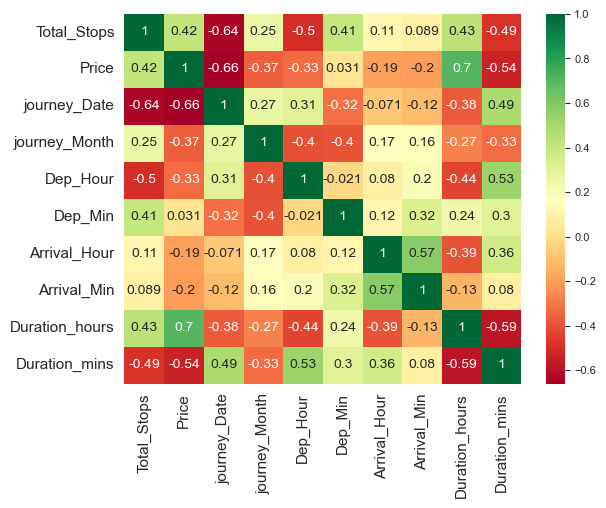

In [137]:
#Heatmap to find the correlation b/w independent to independent and independent to dependent variables
sns.heatmap(data=data.corr(),annot=True,cmap="RdYlGn")
plt.tick_params(labelsize=11)

### Insights
*we have to drop the column if the independent columns are highly related but we dont have any.

*we see that there are few cells which shows high correlation but thats between independent and dependent columns

### Model Creation

In [138]:
#let's separate indep and dep variables
x=df.drop("Price",axis=1)
y=df['Price']

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [140]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8011, 29)
(8011,)
(2671, 29)
(2671,)


### Linear Regression

In [141]:
#Building the Model
lr=LinearRegression()
lr.fit(X=x_train,y=y_train)
y_pred=lr.predict(x_test)

In [142]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2=r2_score(y_true=y_test,y_pred=y_pred)
LR_SCORE=r2

print(f"Mean Square error:   {mse}")
print(f"Mean Absoulte error: {mae}")
print(f"R2 Score:            {r2}")

Mean Square error:   7835152.949901845
Mean Absoulte error: 1949.458356115105
R2 Score:            0.6198931301596471


### KNN

In [143]:
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [144]:
print(f"Accuracy score for KNN considering n_neighbours=5 : {r2_score(y_true=y_test,y_pred=y_pred)}")

Accuracy score for KNN considering n_neighbours=5 : 0.5754563044801433


In [145]:
#Checking for values of n_neighbours in the range from (1,13)
R2_SCORES=[]

for i in range(1,13):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    R2_SCORES.append(r2_score(y_true=y_test,y_pred=y_pred))
    
R2_SCORES
    

[0.47620237482788286,
 0.5350854021043256,
 0.5517857408767249,
 0.5678113683844929,
 0.5754563044801433,
 0.5744867744691025,
 0.5611082549706241,
 0.5568278148788117,
 0.5470822473480635,
 0.5455798222155529,
 0.5390006536523219,
 0.5356442851529665]

Text(0, 0.5, 'R2_SCORE')

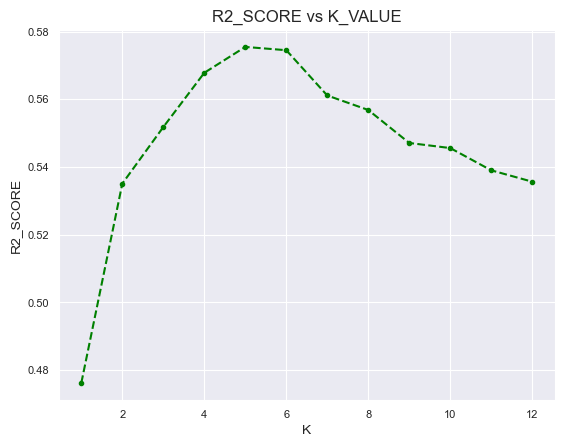

In [146]:
#Lets plot the k-value and r2_scores
plt.plot(range(1,13),R2_SCORES,color='green',marker='o',linestyle='--')
plt.title('R2_SCORE vs K_VALUE')
plt.xlabel('K')
plt.ylabel('R2_SCORE')

##### As we can see the R2_SCORE for k=2 is good we will consider the value of k=2 and evaluate the model further

In [147]:
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [148]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2=r2_score(y_true=y_test,y_pred=y_pred)
KNN_SCORE=r2


print(f"Mean Square error:   {mse}")
print(f"Mean Absoulte error: {mae}")
print(f"R2 Score:            {r2}")

Mean Square error:   9583296.888805691
Mean Absoulte error: 1862.5922875327592
R2 Score:            0.5350854021043256


### DECISION TREE

In [149]:
dtree=DecisionTreeRegressor(random_state=42)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

In [150]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2=r2_score(y_true=y_test,y_pred=y_pred)
DTEE_SCORE=r2

print(f"Mean Square error:   {mse}")
print(f"Mean Absoulte error: {mae}")
print(f"R2 Score:            {r2}")

Mean Square error:   6002823.277194767
Mean Absoulte error: 1363.7507175839262
R2 Score:            0.7087849617373588


### RANDOM FOREST

In [151]:
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [152]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2=r2_score(y_true=y_test,y_pred=y_pred)

print(f"Mean Square error:   {mse}")
print(f"Mean Absoulte error: {mae}")
print(f"R2 Score:            {r2}")

Mean Square error:   4149628.146283173
Mean Absoulte error: 1164.4561638291511
R2 Score:            0.7986890395413554


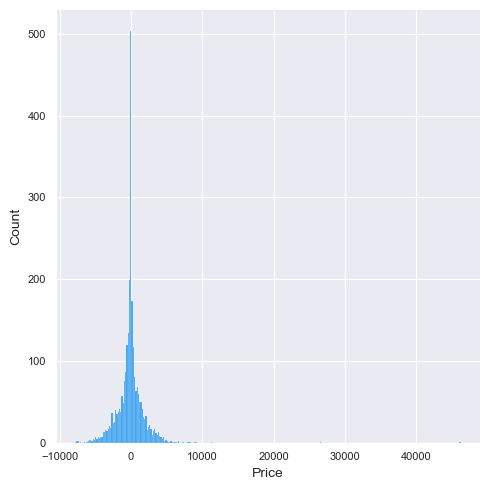

In [153]:
sns.displot(y_test-y_pred)

### HYPERPARAMETER TUNING

In [154]:
n_estimator=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,3,10,15,100]
min_samples_leaf=[1,2,5,10]

In [155]:
random_grid={'n_estimators':n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf
    
}

In [156]:
rf_random=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,scoring='r2')
rf_random.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='r2')

In [157]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [158]:
random_forest=RandomForestRegressor(n_estimators=1000,min_samples_split=3,min_samples_leaf=2,max_features='auto',max_depth=20)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [159]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2=r2_score(y_true=y_test,y_pred=y_pred)
RF_SCORE=r2

print(f"Mean Square error:   {mse}")
print(f"Mean Absoulte error: {mae}")
print(f"R2 Score:            {r2}")

Mean Square error:   3823321.075656497
Mean Absoulte error: 1127.6281398580454
R2 Score:            0.8145191784060006


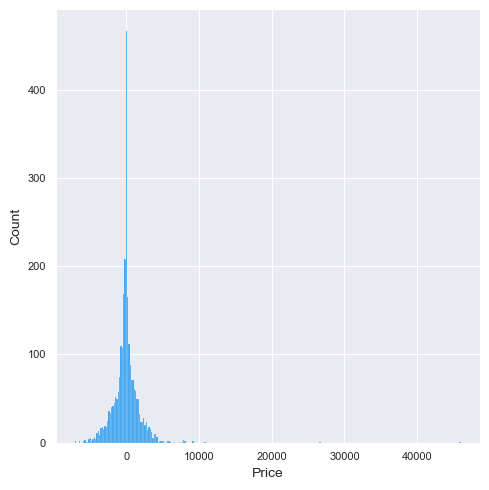

In [160]:
sns.displot(y_test-y_pred)

### Insight:
*We can see the normal distribution in the curve

Text(0, 0.5, 'y_pred')

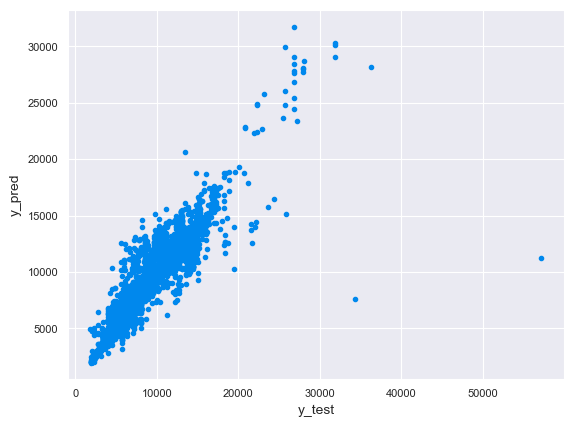

In [161]:
plt.scatter(y_test,y_pred,)
plt.xlabel('y_test')
plt.ylabel('y_pred')

### Insight:
*We can see the observation is linearly scattered

### GRADIENT BOOSTING

In [162]:
gbm=GradientBoostingRegressor(n_estimators=100)
gbm.fit(x_train,y_train)
y_pred=gbm.predict(x_test)

In [163]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2=r2_score(y_true=y_test,y_pred=y_pred)

print(f"Mean Square error:   {mse}")
print(f"Mean Absoulte error: {mae}")
print(f"R2 Score:            {r2}")

Mean Square error:   4305821.588856734
Mean Absoulte error: 1487.9217577468987
R2 Score:            0.7911116251723138


### HYPERPARAMETER TUNING

In [164]:
param_grid={'n_estimators':[100,200,300],
             'learning_rate':[0.01,0.1,0.2],
             'max_depth':[3,4,5],
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1,2,4],
            'subsample':[0.8,0.9,1.0]
    
}

In [165]:
rsc=RandomizedSearchCV(estimator=gbm,param_distributions=param_grid,scoring='r2')
rsc.fit(x_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='r2')

In [166]:
rsc.best_params_

{'subsample': 0.9,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'learning_rate': 0.1}

In [167]:
gradient_boost=GradientBoostingRegressor(n_estimators=100,min_samples_leaf=2,min_samples_split=10,learning_rate=0.1,max_depth=5,subsample=0.9)
gradient_boost.fit(x_train,y_train)
y_pred=gradient_boost.predict(x_test)

In [168]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2=r2_score(y_true=y_test,y_pred=y_pred)
GB_SCORE=r2

print(f"Mean Square error:   {mse}")
print(f"Mean Absoulte error: {mae}")
print(f"R2 Score:            {r2}")

Mean Square error:   3511432.109608584
Mean Absoulte error: 1282.3267123252217
R2 Score:            0.8296498515888007


### RESULT
*LinearRegressor: 0.61

*KNN Regressor: 0.53

*DecisionTreeRegressor: 0.70

*RandomForestRegressor: 0.81

*GradientBoostingRegressor: 0.82

In [170]:
scores=[LR_SCORE,KNN_SCORE,DTEE_SCORE,RF_SCORE,GB_SCORE]
algos=['Linear Regression','KNN','Decision Tree','Random Forest','Gradient Boosting']

for i in range(len(scores)):
    print(f"The R2 score achieved using {algos[i]} is : {scores[i]}")

The R2 score achieved using Linear Regression is : 0.6198931301596471
The R2 score achieved using KNN is : 0.5350854021043256
The R2 score achieved using Decision Tree is : 0.7087849617373588
The R2 score achieved using Random Forest is : 0.8145191784060006
The R2 score achieved using Gradient Boosting is : 0.8296498515888007


<Axes: xlabel='Algorithms', ylabel='R2 Score'>

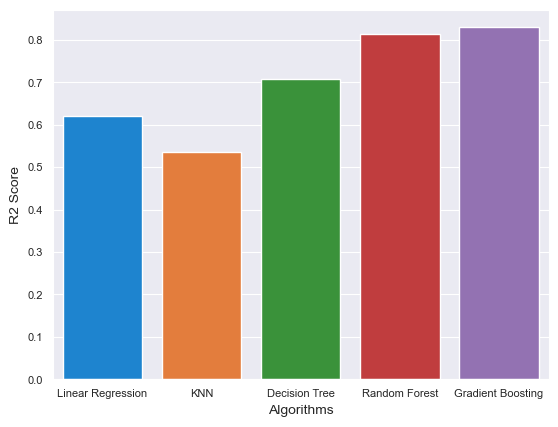

In [171]:
plt.xlabel("Algorithms")
plt.ylabel("R2 Score")
sns.barplot(x=algos,y=scores)

## CONCLUSION
#### *The best model is Gradient Boosting with r2_score of 0.82
#### *The second best model followed by Gradient Boosting is Random Forest with a r2_score of 0.81
#### *Some of the best features which has high impact on price are Total_Stops,Duration,Airline and Route